# **Taller No. 3: Segmentación por agrupamiento (*clustering*)**

## **Autores**: 
- Vivian Natalia Gómez Cubillos 
- Kelly Katherine Penaranda Rivera

# **Contenido**
1. [**Introducción**](#id1)
2. [**Método**](#id2)
3. [**Código**](#id3)
4. [**Resultados**](#id4)
5. [**Conclusión y discusión**](#id5)


## **1. Introducción**<a name="id1"></a>
En el presente trabajo se seleccionó un conjunto de imágenes de diferentes características, tales como dimensiones, paletas de colores y composiciones. Cada una de ellas tenía un determinado objeto que queríamos resaltar o segmentar como se describe a continuación:

- [Pez payaso en el agua](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/d.jpg): El objetivo era que se  resaltara la figura del pez, sin perder las rayas que lo caracterizan, y separandolo del fondo.
- [Aves volando en el atardecer](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/c.jpg): El objetivo de esta segmentación era resaltar la silueta de las aves que se muestran en la imagen.
- [Conejo](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/b.jpg): Al aplicar una segmentación sobre esta imagen se esperaba obtener al conejo.
- [Elefantes](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/a.jpg): El objetivo era resaltar la figura de los elefantes, separandolos del fondo.

## **2. Método**<a name="id2"></a>

## **3. Código**<a name="id3"></a>

## **4. Resultados**<a name="id4"></a>
Tras aplicar el algoritmo implementado y descrito en la sección anterior, obtuvimos los siguientes resultados para cada imagen seleccionada:

### [Pez payaso en el agua](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/d.jpg):

En este caso, dado el objetivo de segmentación, usamos un k=3, de modo que se generaran 3 grupos en la imagen segmentada. 

Hicimos dos experimentaciones, para comparar los resultados de inicializar los centroides de manera estratégica y de manera aleatoria.

Para la primera, inicializamos los centroides con los colores de cada grupo que queríamos segmentar. Para ellos, usando una herramienta de edición de imágenes,  escogimos un color de cada región que queríamos resaltar (uno del color naranja del pez, otro de las franjas blancas y el último con un tono verde oscuro del fondo). Por otro lado, el criterio para mover los clusters fue asignar cada pixel al grupo de su color más cercano, usando la función explicada en detalle en la sección Método. De este modo, se agruparon todos los píxeles en los grupos de cada color de nuestro interés. Finalmente, para el criterio de convergencia, usamos un máximo de 25 iteraciones y un umbral de 15, de modo que al comparar las dos últimas iteraciones si los centroides se mueven por debajo de la distancia umbral seleccionada, se establece que hay convergencia y se detiene el algoritmo, pues de esta manera sabemos que los centroides de dichas iteraciones son “virtualmente iguales”.

En particular, el umbral se determinó de manera experimental, hicimos 4 pruebas con diferentes umbrales y la misma inicialización de los centroides. Como se muestra a continuación:


![ ](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/Comparacion%20Pez.PNG)

De lo anterior, seleccionamos como mejor resultado el correspondiente a la selección del umbral 15, puesto que segmentaba la región que queríamos (pez con sus franjas) y eliminaba, más que umbral 1 y 15, la información de lo que parece ser una “soga” en el fondo de la imágen. Adicionalmente, notamos que se realizó un menor número de iteraciones cuando se aumentó el umbral, esto se debe a que se cumple más rápidamente el criterio de convergencia ya explicado. El proceso para obtener la imagen resultante se muestra a continuación.

In [2]:
import utils.segmentation as seg
import matplotlib.pyplot as plt

In [3]:
url1 = "https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/d.jpg"
img1 = seg.download_image(url1)

The shape of the image is: (326, 540, 3)


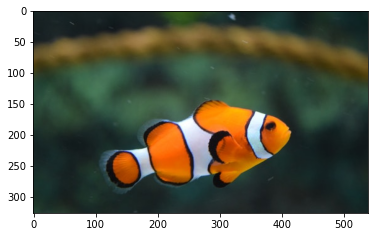

In [4]:
plt.imshow(img1)
plt.show()

C  [(255, 161, 8), (247, 251, 252), (42, 65, 59)]
Iteracion actual -> 1
Iteracion actual -> 2


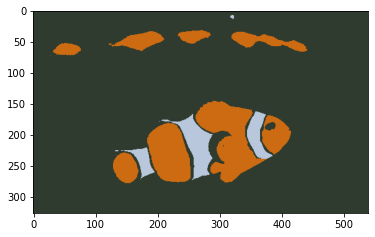

[(205, 107, 18), (184, 199, 219), (46, 59, 46)]

In [5]:
seg.kmeans(3, img1, 25, 30, False, [(255, 161, 8), (247, 251, 252), (42, 65, 59)])

También hicimos el proceso con 3 clusters, inicializando los centroides aleatoriamente y utilizando el umbral 15. Sin embargo, el resultado fue drásticamente menor. Esto se debe a que los centroides no tomarían en cuenta el tono blanco de las franjas, sino posiblemente otro valor, que al promediarse quedaría más cercano al del fondo.

Coordenadas aleatorias  77 364
Pixel  [62 64 42]
Coordenadas aleatorias  325 133
Pixel  [29 41 39]
Coordenadas aleatorias  259 6
Pixel  [27 46 44]
C  [(62, 64, 42), (29, 41, 39), (27, 46, 44)]
Iteracion actual -> 1
Iteracion actual -> 2
Iteracion actual -> 3
Iteracion actual -> 4
Iteracion actual -> 5


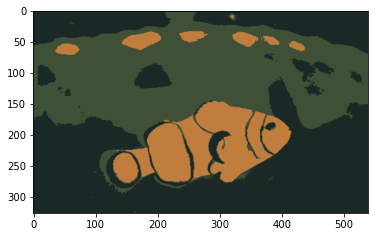

[(192, 125, 62), (27, 40, 38), (64, 80, 55)]

In [6]:
seg.kmeans(3, img1, 25, 15, True, [])

### [Aves volando en el atardecer](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/c.jpg): 
En este caso, de acuerdo con el objetivo definido de segmentación, se estableció un k=2 y así poder obtener una imagen de dos colores.

In [7]:
url2 = "https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/c.jpg"
img2 = seg.download_image(url2)

The shape of the image is: (263, 400, 3)


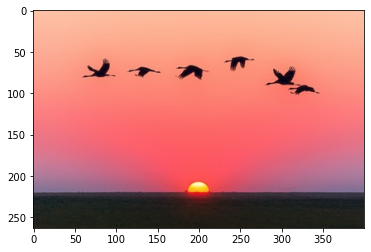

In [8]:
plt.imshow(img2)
plt.show()

Coordenadas aleatorias  38 24
Pixel  [253 177 153]
Coordenadas aleatorias  116 55
Pixel  [252 127 123]
C  [(253, 177, 153), (252, 127, 123)]
Iteracion actual -> 1
Iteracion actual -> 2
Iteracion actual -> 3
Iteracion actual -> 4
Iteracion actual -> 5
Iteracion actual -> 6
Iteracion actual -> 7


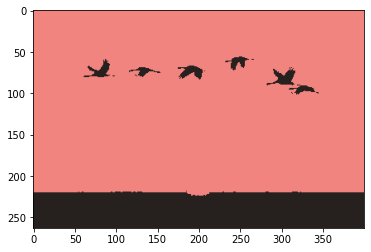

[(241, 132, 127), (38, 32, 31)]

In [9]:
seg.kmeans(2, img2, 25, 0, True, [])

C  [(7, 0, 22), (253, 172, 148)]
Iteracion actual -> 1
Iteracion actual -> 2


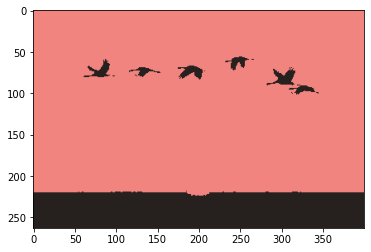

[(38, 32, 31), (241, 132, 127)]

In [10]:
seg.kmeans(2, img2, 25, 1, False, [(7, 0, 22), (253, 172, 148)])

### [Conejo](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/b.jpg):

In [11]:
url3 = "https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/b.jpg"
img3 = seg.download_image(url3)

The shape of the image is: (552, 529, 3)


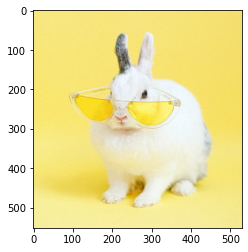

In [12]:
plt.imshow(img3)
plt.show()

Coordenadas aleatorias  537 297
Pixel  [249 240 161]
Coordenadas aleatorias  67 294
Pixel  [230 233 238]
Coordenadas aleatorias  375 131
Pixel  [246 228 118]
Coordenadas aleatorias  393 467
Pixel  [246 230 119]
C  [(249, 240, 161), (230, 233, 238), (246, 228, 118), (246, 230, 119)]
Iteracion actual -> 1
Iteracion actual -> 2
Iteracion actual -> 3
Iteracion actual -> 4
Iteracion actual -> 5


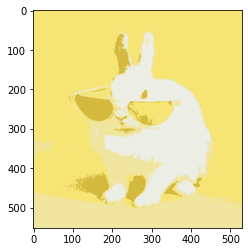

[(240, 229, 158), (236, 237, 228), (211, 185, 62), (246, 228, 116)]

In [13]:
seg.kmeans(4, img3, 25, 5, True, [])

C  [(241, 249, 282), (243, 288, 22), (246, 224, 113)]
Iteracion actual -> 1
Iteracion actual -> 2
Iteracion actual -> 3
Iteracion actual -> 4
Iteracion actual -> 5


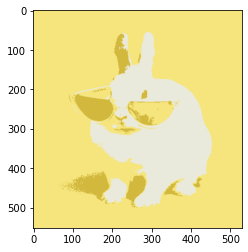

[(234, 234, 220), (210, 184, 61), (245, 229, 124)]

In [14]:
seg.kmeans(3, img3, 25, 1, False, [(241, 249, 282), (243, 288, 22), (246, 224, 113)])

### [Elefantes](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/a.jpg):

In [15]:
url4 = "https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/a.jpg"
img4 = seg.download_image(url4)

The shape of the image is: (320, 500, 3)


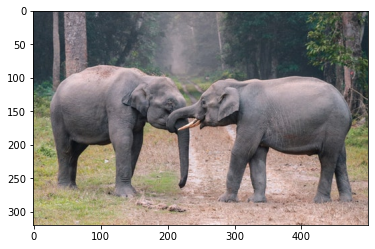

In [16]:
plt.imshow(img4)
plt.show()

Coordenadas aleatorias  29 192
Pixel  [111 114 123]
Coordenadas aleatorias  107 366
Pixel  [198 178 180]
Coordenadas aleatorias  197 307
Pixel  [99 93 97]
C  [(111, 114, 123), (198, 178, 180), (99, 93, 97)]
Iteracion actual -> 1
Iteracion actual -> 2


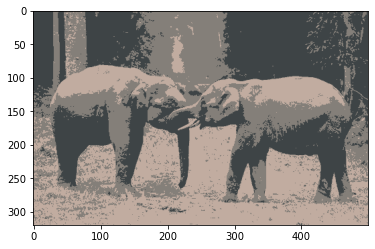

[(132, 127, 121), (193, 172, 160), (62, 68, 70)]

In [17]:
seg.kmeans(3, img4, 25, 5, True, [])

C  [(120, 120, 129), (181, 158, 151), (76, 97, 72)]
Iteracion actual -> 1
Iteracion actual -> 2
Iteracion actual -> 3


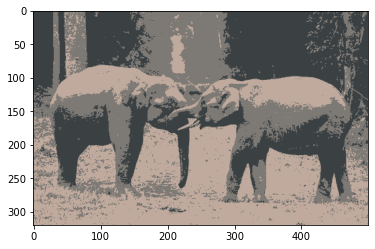

[(125, 121, 117), (191, 170, 157), (59, 65, 67)]

In [18]:
seg.kmeans(3, img4, 25, 1, False, [(120, 120, 129), (181, 158, 151), (76, 97, 72)])

## **5. Conclusión y discusión**<a name="id5"></a>